In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy import stats
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
df = pd.read_csv('C:\\Users\\anish\\OneDrive\\Documents\\AI Algo\\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df_num = df.loc[:,["age","bmi","charges"]]
df_cat = df.loc[:,["sex","children","smoker","region"]]
df_num.head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


In [9]:
df_cat.head()

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df_num.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


## Exploratory Data Analysis

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df = pd.get_dummies(df, prefix = ["sex", "smoker", "region"], drop_first=True)

In [14]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Comparison of charges for smokers & non-smokers

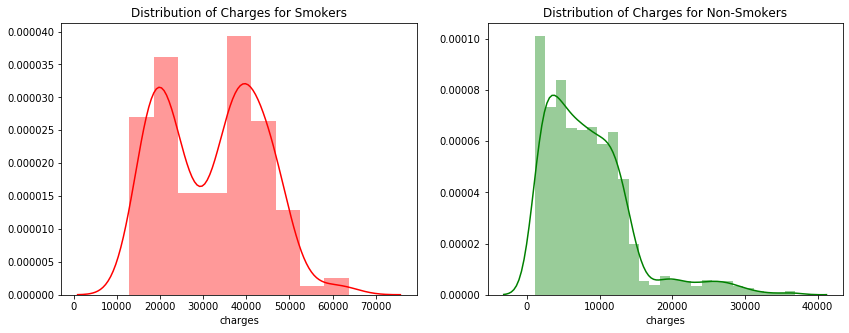

In [15]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

sns.distplot(df[df['smoker_yes']==1]['charges'], ax=axes[0], color='r').set_title('Distribution of Charges for Smokers')

sns.distplot(df[df['smoker_yes']==0]['charges'], ax=axes[1], color='g')
plt.title('Distribution of Charges for Non-Smokers')
plt.show()

The graph above shows that smokers are charged higher than the non-smokers and the charges for most smokers are between 15000 to 50000.

The graph for non-smokers shows that the target variable is skewed to the right i.e. maximum number of non-smokers are charged little for their insurance. The graph also shows that there are outliers in the data.

### Charges for Males vs Females

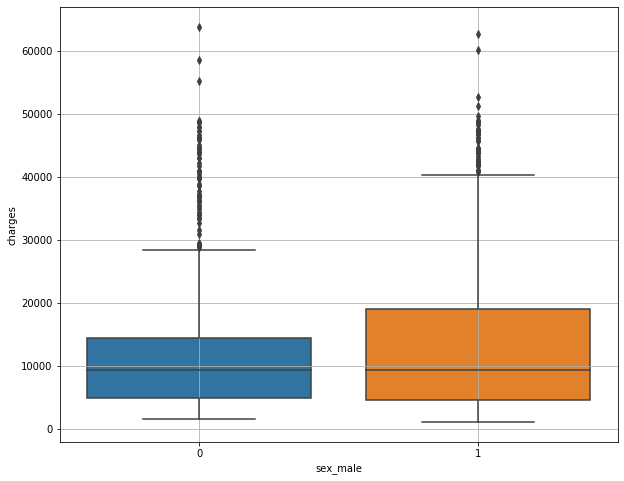

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(df['sex_male'], df['charges'])
plt.grid()
plt.show()

There is not much difference between the charges for men and women. The presence of a lot of outliers is also observed specially in the Female part.

### BMI vs. Charges

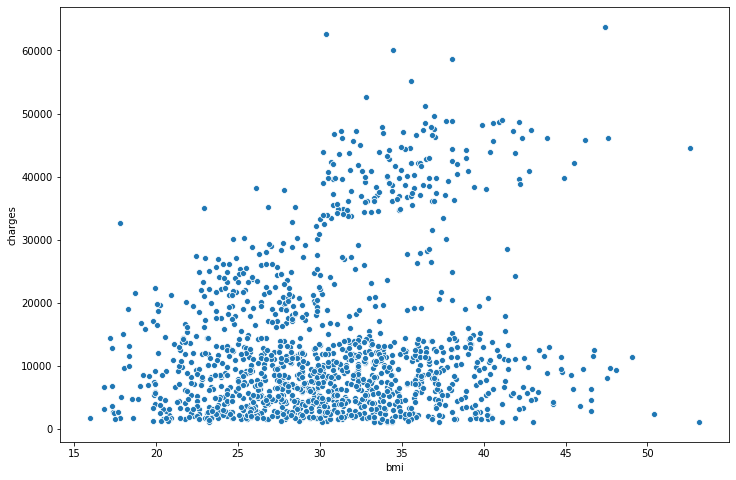

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.show()

BMI above 30 is considered obese and we can see that as the BMI increases above 30 the charge rates shoot up.

### Variation of Charges with number of Children

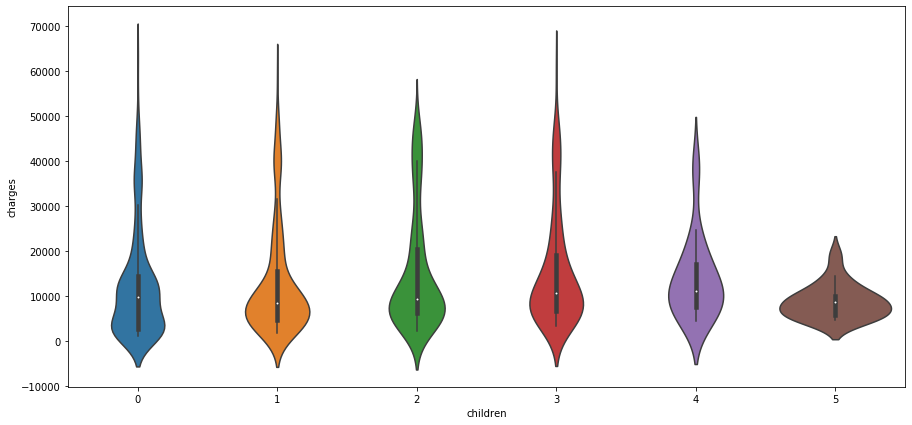

In [18]:
plt.figure(figsize=(15,7))
sns.violinplot(x='children', y='charges', data=df)
plt.show()

The violin plot clearly shows that people with 5 children have the lowest charges, but it is difficult to say anything about the highest charges. Lets plot a barchart to clarify things.

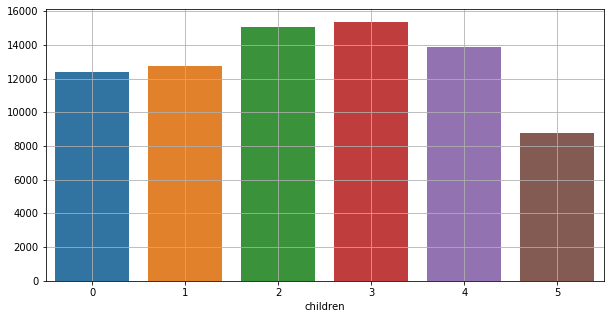

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(df.groupby('children').mean()['charges'].index, df.groupby('children').mean()['charges'].values)
plt.grid()
plt.show()

The barchart clearly shows that people with 3 children have the highest charges. It also validates the result of the violinplot that people with 5 children have the lowest charges.

### Correlation Matrix

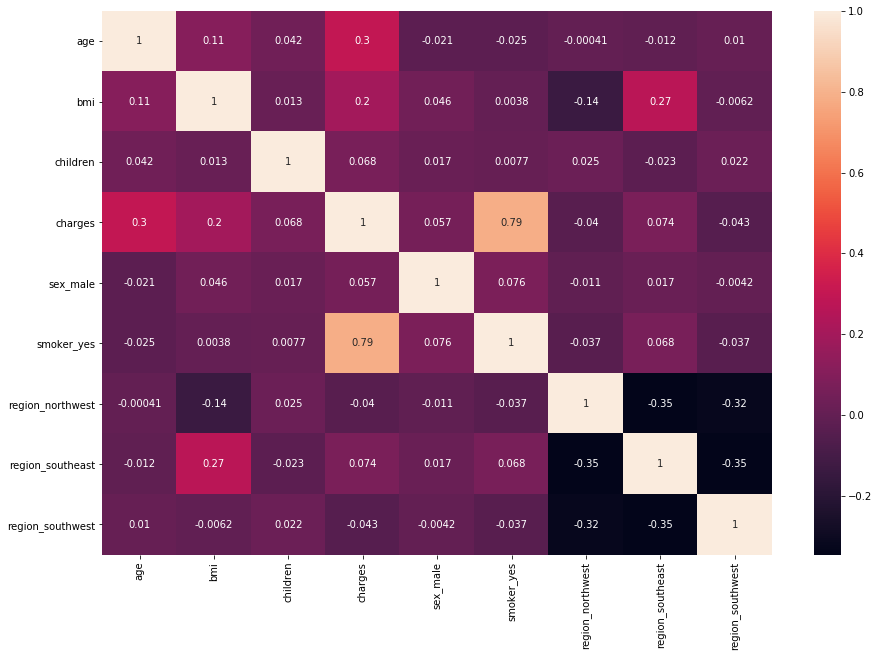

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

The highest correlation of Charges is with Smokers and the lowest correlation is with different regions.

### Pre-processing the Data

The categorical features were converted into dummy features as the first step towards pre-processing.

The next step would be defining the features as independent and dependent in the form of X and y respectively, and finally scale the independent features X.

In [21]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

ss = StandardScaler()

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

## Statistical Analysis

In [22]:
Xc = sm.add_constant(X)
model = sm.OLS(y, Xc)
lr = model.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:29:12   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_male          -131.3144    332.945     -0.394      0.693    -784.470     521.842
smoker_yes        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusions from the Statisticale Summary

1. The p-value for the sex region is 0.692 and hence it is irrelevant. We also deduced the same from the visualization that the charges were not biased to any gender.
2. The charges are very much dependent on smoking and hence the p-value for that region is 0.00.
3. The p-value for the children is also 0. Hence we can confidently say that the charges vary with the number of children a person has. Same goes with age and BMI.
4. Coming to the region column, as the p-value is large it can be concluded that the variation in charges is not dependent on the region.
5. To our surprise all the visualization conclusions align with the statistical summary, but it should be kept in mind that the visualizations may be confusing at times and may not always tell us what is really going on. We should always perform statistical analysis to confirm our beliefs.

## Linear Regression - Machine Learning Approach

In [23]:
X = df.drop(['charges'], axis = 1)
y = df.charges

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)
lr = LinearRegression().fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("The score is:",lr.score(X_test,y_test))
print("The RMSE for the training set is:",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("The RMSE for the testing set is:",np.sqrt(mean_squared_error(y_test, y_test_pred)))

The score is: 0.7958786376014415
The RMSE for the training set is: 6164.499984064468
The RMSE for the testing set is: 5668.8400259119835


### A little bit of Preprocessing

In [24]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(X_train,y_train)

y_train_pred = plr.predict(X_train)
y_test_pred = plr.predict(X_test)

rmseLinear = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("The score is:",plr.score(X_test,y_test))
print("The RMSE for the training set is:",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("The RMSE for the testing set is:",np.sqrt(mean_squared_error(y_test, y_test_pred)))

The score is: 0.884186506011593
The RMSE for the training set is: 4891.747938130571
The RMSE for the testing set is: 4270.016510582635


A little step of preprocessing can give us wonderful results. This shows the importance of preprocessing.

### Feature Selection

#### Recursive Feature Selection

In [25]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=4)
rfe.fit(X, y)
pd.DataFrame(rfe.ranking_, index=X.columns, columns=['Select'])

,Select
age,4
bmi,2
children,1
sex_male,5
smoker_yes,1
region_northwest,3
region_southeast,1
region_southwest,1


Hyperparameter Tuning is required as the number of features to select is not known. We will use GridSearchCV to tune the hyperparameters.

In [26]:
lr = LinearRegression()
param_grid = [{'n_features_to_select':list(range(1,len(df.columns)+1))}]

rfe = RFE(lr)
gsearch = GridSearchCV(rfe, param_grid=param_grid, cv=3, return_train_score=True)
gsearch.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [27]:
print(gsearch.best_params_)
pd.DataFrame(gsearch.cv_results_)

{'n_features_to_select': 8}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.007317,0.001245,0.001326,4.727955e-04,1,{'n_features_to_select': 1},0.613007,0.636467,0.606371,0.618615,0.012911,6,0.622920,0.610644,0.626179,0.619914,0.006689
1,0.004988,0.000792,0.000997,2.973602e-07,2,{'n_features_to_select': 2},0.612455,0.626078,0.600171,0.612901,0.010581,9,0.623421,0.612482,0.627555,0.621152,0.006359
2,0.004636,0.000481,0.001008,2.215483e-05,3,{'n_features_to_select': 3},0.612135,0.626682,0.604645,0.614488,0.009149,8,0.623925,0.612990,0.631034,0.622650,0.007421
3,0.003985,0.000005,0.000997,2.247832e-07,4,{'n_features_to_select': 4},0.615116,0.630037,0.605025,0.616726,0.010274,7,0.628286,0.617143,0.631268,0.625565,0.006079
4,0.003991,0.000024,0.001651,4.620387e-04,5,{'n_features_to_select': 5},0.614995,0.670899,0.604787,0.630227,0.029060,5,0.628458,0.654914,0.631271,0.638214,0.011864
5,0.003658,0.000941,0.000997,6.257699e-07,6,{'n_features_to_select': 6},0.614266,0.754207,0.642963,0.670479,0.060353,4,0.628684,0.744790,0.671938,0.681804,0.047911
6,0.002660,0.000470,0.001994,2.247832e-07,7,{'n_features_to_select': 7},0.653922,0.755248,0.643199,0.684123,0.050483,3,0.667631,0.744851,0.672026,0.694836,0.035412
7,0.002327,0.000470,0.001331,4.701351e-04,8,{'n_features_to_select': 8},0.749271,0.755182,0.728288,0.744247,0.011540,1,0.750222,0.744852,0.761373,0.752149,0.006881
8,0.002317,0.000957,0.000997,4.052337e-07,9,{'n_features_to_select': 9},0.749271,0.755182,0.728288,0.744247,0.011540,1,0.750222,0.744852,0.761373,0.752149,0.006881


Putting the n_features_to_select value as best_params and building the model.

In [28]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X, y)
pd.DataFrame(rfe.ranking_, index=X.columns, columns=['Rank'])

,Rank
age,1
bmi,1
children,1
sex_male,1
smoker_yes,1
region_northwest,1
region_southeast,1
region_southwest,1


## Gradient Boosting

In [31]:
gbc_reg = GradientBoostingRegressor()
gbc_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
r2_score(y_test, gbc_reg.predict(X_test))

0.8843652239013468

In [34]:
r2_score(y_train, gbc_reg.predict(X_train))

0.9162676532317314